In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import os
import datetime
import matplotlib.gridspec as gridspec
import time
import matplotlib.patheffects as PathEffects
from osgeo import gdal, osr
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid.inset_locator import inset_axes
#style.use('seaborn-whitegrid')
%matplotlib inline

/Users/ihasan/anaconda3/lib/python3.7/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [3]:
binpath_b = '/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/' 
fn_b = os.path.join(binpath_b,'point_inf.csv') 
df = pd.read_csv(fn_b)
df['Coordinates'] = list(zip(df.Long, df.Lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
sites = gpd.GeoDataFrame(df, geometry='Coordinates')

In [22]:
sdir1 = os.path.dirname('/Users/ihasan/Downloads/Rivers of Bangladesh/Bangladesh/BGD_adm/3/BGD_adm2.shp')
sf = os.path.dirname('/Users/ihasan/Downloads/Rivers of Bangladesh/natural/natural.shp')
Bangladesh = gpd.read_file(sdir1)
fr = gpd.read_file(sf)

In [31]:
cln = 'NAME_2'
std_a = ['Shatkhira', 'Khulna','Bagerhat', 'Jessore', 'Narail', 'Gopalgonj','Pirojpur']
ids = [np.where(Bangladesh[cln]==nm)[0] for nm in std_a]
ids = np.hstack(ids)

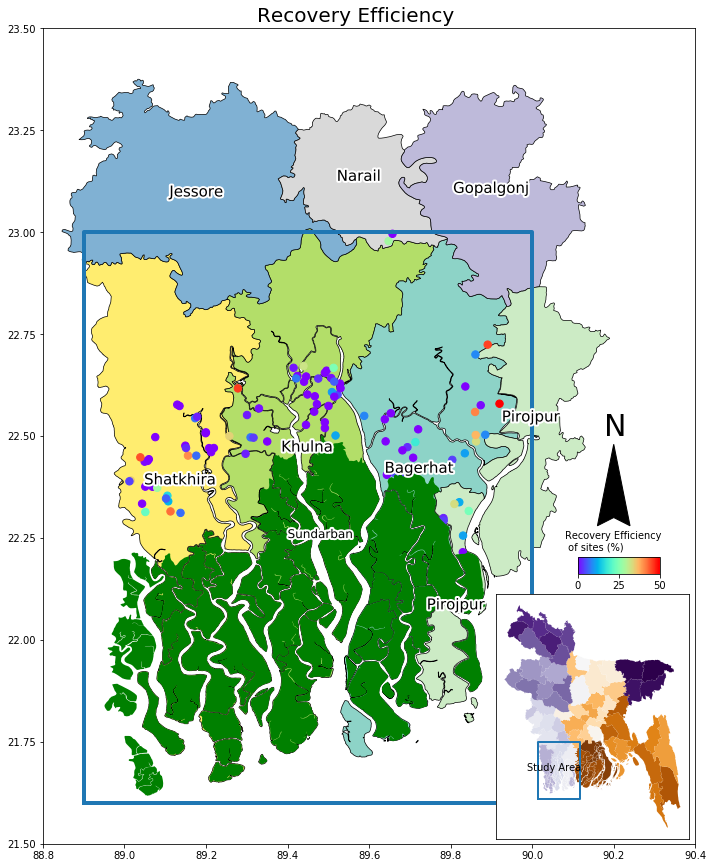

In [24]:
#fig=plt.figure()

studyar = Bangladesh.iloc[ids,:]
#studyar.iloc[7,6]='Bagerhat'
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')
plt.suptitle('Recovery Efficiency',x=0.5, y=0.9, fontsize=20)

plt.text(x=90.08, y=22.22, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])
plt.text(x=90.2-0.025, y=22.5, s='N', fontsize=30)
plt.arrow(90.2, 22.3, 0, 0.18, length_includes_head=True,
          head_width=0.08, head_length=0.2, overhang=.1, facecolor='k')
plt.plot([88.9, 90, 90, 88.9, 88.9],[21.6, 21.6, 23, 23,21.6], lw=4)
for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=15, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])
#std_a1.axis('equal')
plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)


a=inset_axes(std_a1, width="30%", height='30%',loc='lower right')
Bangladesh.plot(figsize=(20,20), cmap='PuOr',ax=a)
plt.text(x=88.6, y=22.25, s='Study Area', fontsize=9.8)
plt.plot([88.9, 90, 90, 88.9, 88.9],[21.5, 21.5, 23, 23,21.5], lw=2)
plt.xticks([])
plt.yticks([])


sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df['RE_all'].min(), vmax=50))
sm._A = []
cbar_axis = inset_axes(std_a1, width='10%', height='5%',loc='lower left',
                       bbox_to_anchor=[90.1, 22.15, 2, 0.8],bbox_transform=std_a1.transData)
#cbar_axis = fig.add_axes([0.8, 0.2, 0.3, 0.2])
cbar = plt.colorbar(sm, cax=cbar_axis, orientation='horizontal', pad=0.02)
plt.savefig('/Users/ihasan/Downloads/99_site_data/report/RE_map.png', dpi=300);

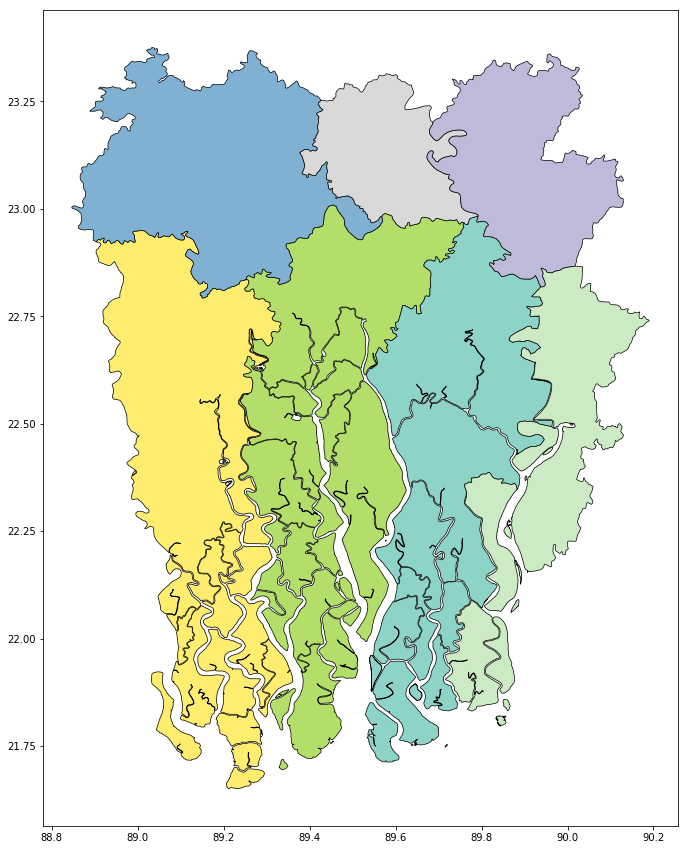

In [35]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map.png', dpi=300)

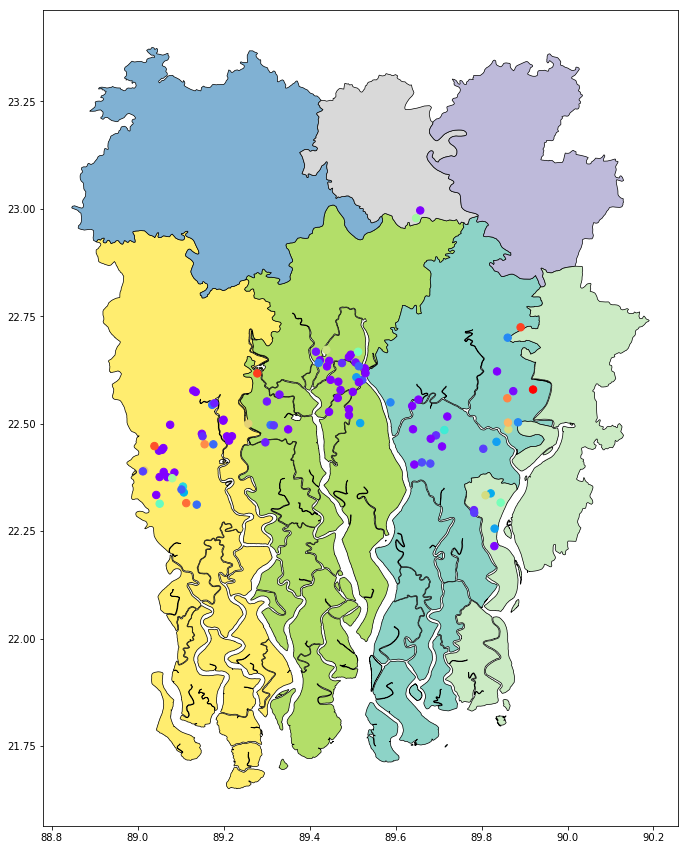

In [38]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map1.png', dpi=300)

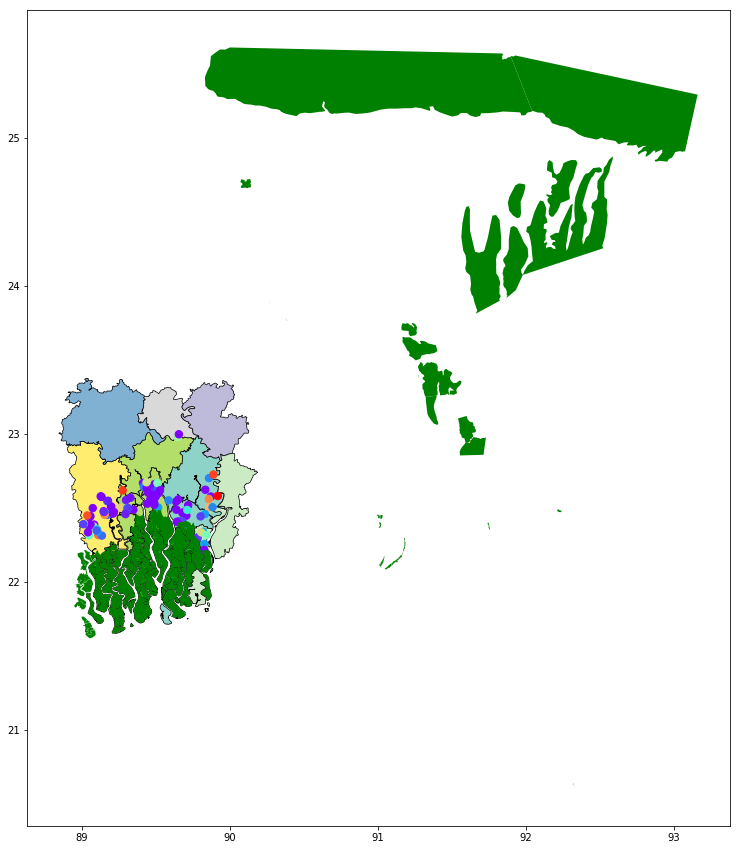

In [39]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map2.png', dpi=300)

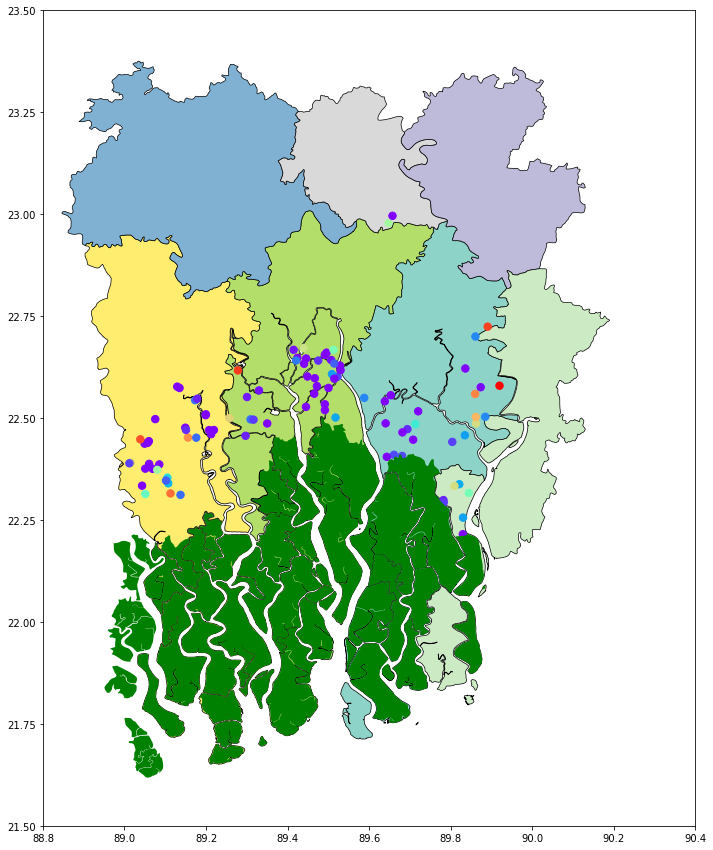

In [40]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')
plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)

plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map3.png', dpi=300)

In [89]:
x=np.linspace(0.1,400, 84)
y=1.01157**x
print (y[-1])

99.62685466174739


13780.61233982238


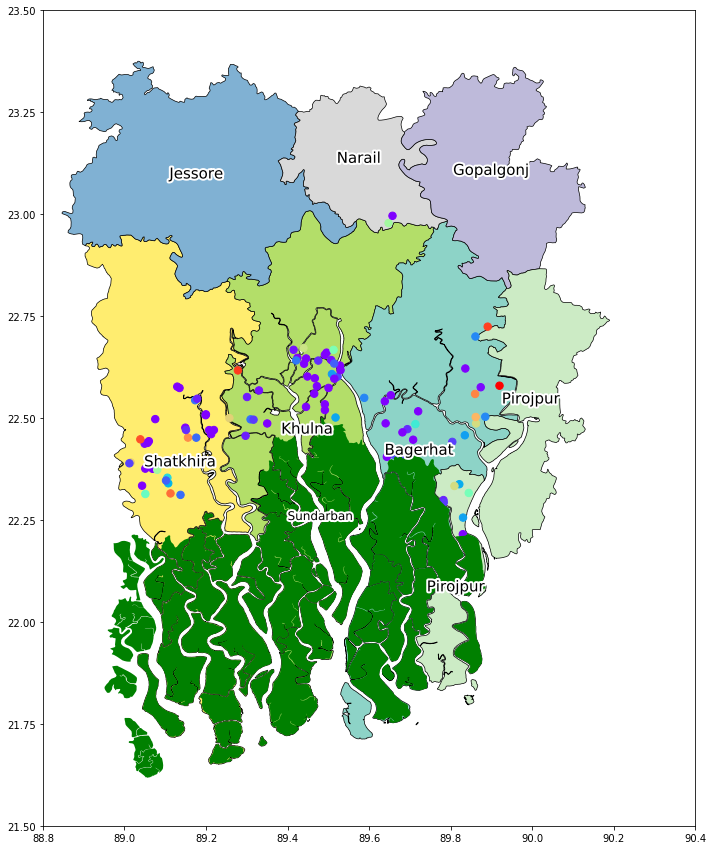

In [90]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=15, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map4.png', dpi=300)

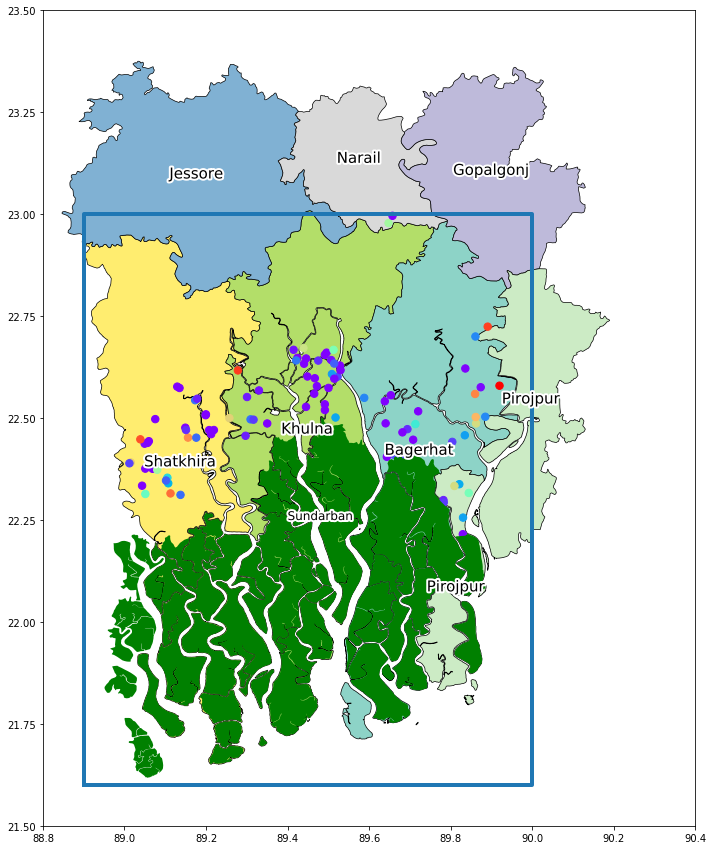

In [91]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=15, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

plt.plot([88.9, 90, 90, 88.9, 88.9],[21.6, 21.6, 23, 23,21.6], lw=4)
plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map5.png', dpi=300)

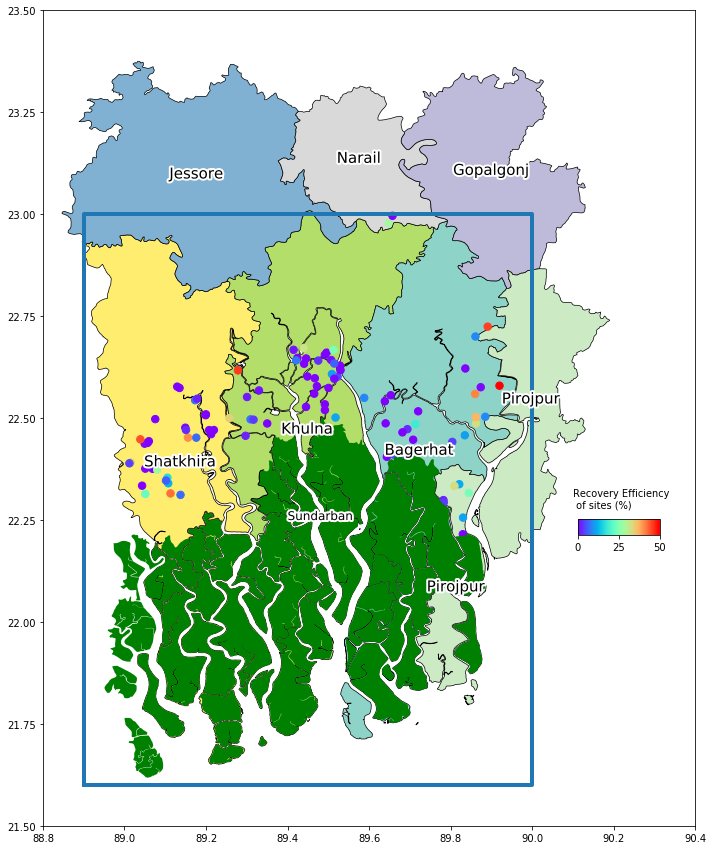

In [104]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=15, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

plt.plot([88.9, 90, 90, 88.9, 88.9],[21.6, 21.6, 23, 23,21.6], lw=4)
plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)


sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df['RE_all'].min(), vmax=50))
sm._A = []
cbar_axis = inset_axes(std_a1, width='10%', height='5%',loc='lower left',
                       bbox_to_anchor=[90.1, 22.2, 2, 0.8],bbox_transform=std_a1.transData)
cbar = plt.colorbar(sm, cax=cbar_axis, orientation='horizontal', pad=0.02)
std_a1.text(x=90.1, y=22.28, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map6.png', dpi=300)

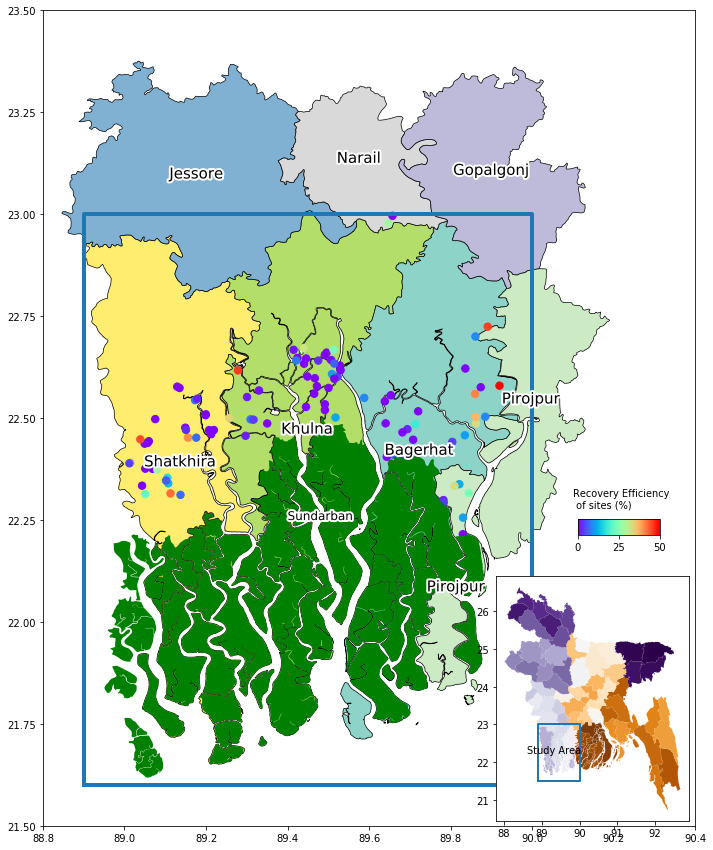

In [106]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=15, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

plt.plot([88.9, 90, 90, 88.9, 88.9],[21.6, 21.6, 23, 23,21.6], lw=4)
plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)


sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df['RE_all'].min(), vmax=50))
sm._A = []
cbar_axis = inset_axes(std_a1, width='10%', height='5%',loc='lower left',
                       bbox_to_anchor=[90.1, 22.2, 2, 0.8],bbox_transform=std_a1.transData)
cbar = plt.colorbar(sm, cax=cbar_axis, orientation='horizontal', pad=0.02)
std_a1.text(x=90.1, y=22.28, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)

a=inset_axes(std_a1, width="30%", height='30%',loc='lower right')
Bangladesh.plot(figsize=(20,20), cmap='PuOr',ax=a)
a.text(x=88.6, y=22.25, s='Study Area', fontsize=9.8)
a.plot([88.9, 90, 90, 88.9, 88.9],[21.5, 21.5, 23, 23,21.5], lw=2)
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map7.png', dpi=300)

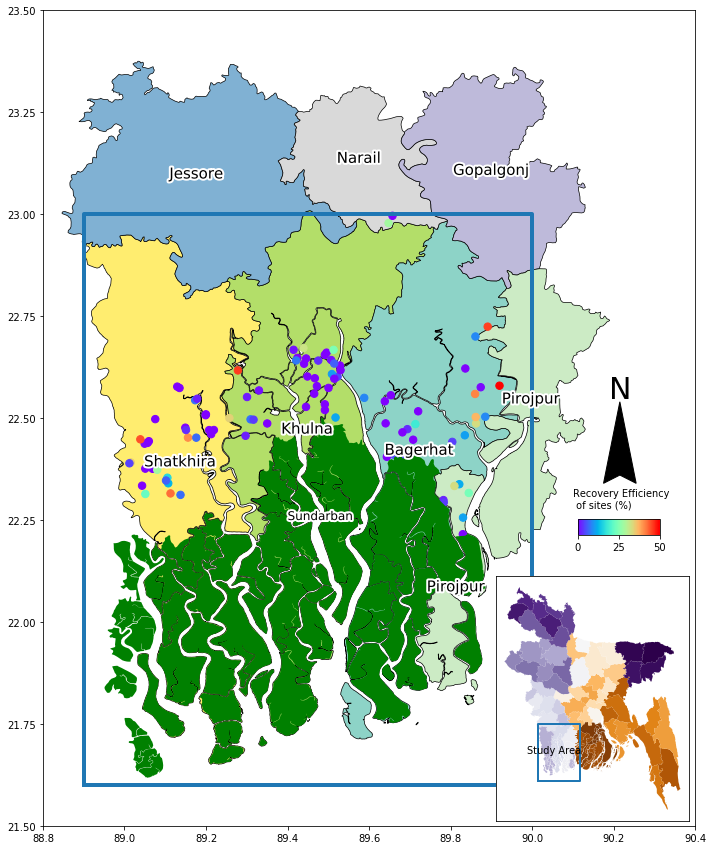

In [115]:
studyar = Bangladesh.iloc[ids,:]
std_a1=studyar.plot(figsize=(15,15),column=cln, cmap='Set3', edgecolor='k', lw=0.7)
csm = sites.plot(ax=std_a1, column='RE_all', cmap='rainbow', markersize=55)
fr[fr['type']=='forest'].plot(ax=std_a1, color='g')

tx1 = plt.text(x=89.4, y=22.25, s='Sundarban', fontsize=12)
tx1.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

for idx, row in studyar.iterrows():
    fnt = 10
    txt=plt.annotate(s=row[cln], xy=(studyar.geometry.centroid.x[idx],studyar.geometry.centroid.y[idx]),
                 horizontalalignment='center', fontsize=15, wrap=True, color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=4, foreground='w')])

plt.plot([88.9, 90, 90, 88.9, 88.9],[21.6, 21.6, 23, 23,21.6], lw=4)

std_a1.text(x=90.214-0.025, y=22.55, s='N', fontsize=30)
std_a1.arrow(90.215, 22.36, 0, 0.18, length_includes_head=True,
          head_width=0.08, head_length=0.2, overhang=.1, facecolor='k')

plt.xlim(88.8, 90.4)
plt.ylim(21.5, 23.5)


sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=df['RE_all'].min(), vmax=50))
sm._A = []
cbar_axis = inset_axes(std_a1, width='10%', height='5%',loc='lower left',
                       bbox_to_anchor=[90.1, 22.2, 2, 0.8],bbox_transform=std_a1.transData)
cbar = plt.colorbar(sm, cax=cbar_axis, orientation='horizontal', pad=0.02)
std_a1.text(x=90.1, y=22.28, s='Recovery Efficiency \n of sites (%)', fontsize=9.8)

a=inset_axes(std_a1, width="30%", height='30%',loc='lower right')
Bangladesh.plot(figsize=(20,20), cmap='PuOr',ax=a)
a.text(x=88.6, y=22.25, s='Study Area', fontsize=9.8)
a.plot([88.9, 90, 90, 88.9, 88.9],[21.5, 21.5, 23, 23,21.5], lw=2)
a.set_xticks([])
a.set_yticks([])
plt.savefig('/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/RE_map8.png', dpi=300)